### Exercício 10 realizado por Alícia Gouveia e Sofia Rodrigues

Using the dataset in EFIplus_medit.zip:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import plotly.express as px
import plotly.graph_objects as go


In [2]:
#Load the dataset
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Drop NaN values
df = df.dropna()

# Display the column names (header names) of the dataset
print(df.columns.tolist())

df

['Site_code', 'Latitude', 'Longitude', 'Country', 'Catchment_name', 'Galiza', 'Subsample', 'Calib_EFI_Medit', 'Calib_connect', 'Calib_hydrol', 'Calib_morphol', 'Calib_wqual', 'Geomorph1', 'Geomorph2', 'Geomorph3', 'Water_source_type', 'Flow_regime', 'Altitude', 'Geological_typology', 'Actual_river_slope', 'Natural_sediment', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul', 'Barriers_catchment_down', 'Barriers_river_segment_up', 'Barriers_river_segment_down', 'Barriers_number_river_segment_up', 'Barriers_number_river_segment_down', 'Barriers_distance_river_segment_up', 'Barriers_distance_river_segment_down', 'Impoundment', 'Hydropeaking', 'Water_abstraction', 'Hydro_mod', 'Temperature_impact', 'Velocity_increase', 'Reservoir_flushing', 'Sedimentation', 'Channelisation', 'Cross_sec', 'Instream_habitat', 'Riparian_vegetation', 'Embankment', 'Floodprotection', 'Floodplain', 'Toxic_substances', 'Acidification', 'Water_quality_index', 'Eutrophication', 'Organic_p

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous
exercises), using the Douro and Tejo basins as the pre determined groups. Produce a biplot with
Catchment_name ’ as a grouping variable.

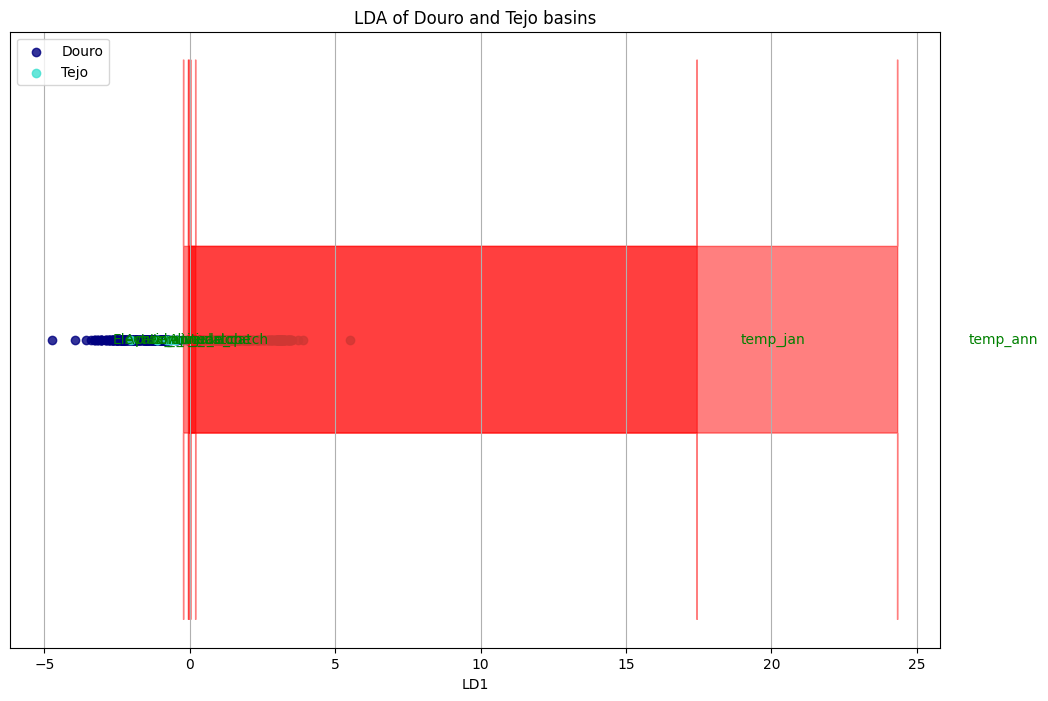

In [4]:
# Select continuous environmental variables and the 'Catchment_name' column
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
data_filtered = df[['Catchment_name'] + continuous_vars]

# Filter the dataset to include only 'Douro' and 'Tejo' in 'Catchment_name'
data_filtered = data_filtered[data_filtered['Catchment_name'].isin(['Douro', 'Tejo'])]

# Drop rows with NaN values in either the features or the target variable
data_filtered = data_filtered.dropna(subset=['Catchment_name'] + continuous_vars)

# Encode the 'Catchment_name' column
catchment_mapping = {'Douro': 0, 'Tejo': 1}
data_filtered['Catchment_name'] = data_filtered['Catchment_name'].map(catchment_mapping)

# Check if there are any remaining NaN values in the target variable
if data_filtered['Catchment_name'].isnull().any():
    raise ValueError("Target variable 'Catchment_name' contains NaN values after processing.")

# Separate features and target variable
X = data_filtered[continuous_vars]
y = data_filtered['Catchment_name']

# Perform LDA
lda = LDA()
X_r2 = lda.fit(X, y).transform(X)

# Create a biplot
plt.figure(figsize=(12, 8))
colors = ['navy', 'turquoise']
target_names = ['Douro', 'Tejo']

if X_r2.shape[1] == 1:
    # If LDA result has only one dimension
    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(X_r2[y == i, 0], np.zeros_like(X_r2[y == i, 0]), alpha=0.8, color=color, label=target_name)
    plt.xlabel('LD1')
    plt.yticks([])  # Hide y-axis ticks because there's no second dimension
else:
    # If LDA result has two dimensions
    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name)
    plt.xlabel('LD1')
    plt.ylabel('LD2')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Douro and Tejo basins')

# Plotting the loadings (coefficients)
scaling_factor = np.max(X_r2)  # Scaling factor for the arrows
for i in range(X.shape[1]):
    plt.arrow(0, 0, lda.coef_[0, i] * scaling_factor, 0 if X_r2.shape[1] == 1 else lda.coef_[1, i] * scaling_factor, color='r', alpha=0.5)
    plt.text(lda.coef_[0, i] * scaling_factor * 1.15, 0 if X_r2.shape[1] == 1 else lda.coef_[1, i] * scaling_factor * 1.15, continuous_vars[i], color='g', ha='center', va='center')

plt.grid()
plt.show()


2. Try to build interactive plots that display data in the space defined by the Discriminant Functions.

In [5]:
# Select continuous environmental variables and the 'Catchment_name' column
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
data_filtered = df[['Catchment_name'] + continuous_vars]

# Filter the dataset to include only 'Douro' and 'Tejo' in 'Catchment_name'
data_filtered = data_filtered[data_filtered['Catchment_name'].isin(['Douro', 'Tejo'])]

# Drop rows with NaN values in either the features or the target variable
data_filtered = data_filtered.dropna(subset=['Catchment_name'] + continuous_vars)

# Encode the 'Catchment_name' column
catchment_mapping = {'Douro': 0, 'Tejo': 1}
data_filtered['Catchment_name'] = data_filtered['Catchment_name'].map(catchment_mapping)

# Check if there are any remaining NaN values in the target variable
if data_filtered['Catchment_name'].isnull().any():
    raise ValueError("Target variable 'Catchment_name' contains NaN values after processing.")

# Separate features and target variable
X = data_filtered[continuous_vars]
y = data_filtered['Catchment_name']

# Perform LDA
lda = LDA()
X_r2 = lda.fit(X, y).transform(X)

# Create an interactive plot
if X_r2.shape[1] == 1:
    # If LDA result has only one dimension
    fig = px.scatter(x=X_r2[:, 0], y=np.zeros_like(X_r2[:, 0]), color=y, labels={'x': 'LD1', 'y': ''})
    fig.update_yaxes(visible=False)
else:
    # If LDA result has two dimensions
    fig = px.scatter(x=X_r2[:, 0], y=X_r2[:, 1], color=y, labels={'x': 'LD1', 'y': 'LD2'})

# Add loadings (coefficients) arrows
if X_r2.shape[1] > 1:
    for i in range(len(continuous_vars)):
        fig.add_trace(
            go.Scatter(
                x=[0, lda.coef_[0, i] * 3],  # Scaled for better visualization
                y=[0, lda.coef_[1, i] * 3],  # Scaled for better visualization
                mode='lines+text',
                text=[continuous_vars[i]],
                textposition='top right'
            )
        )
else:
    for i in range(len(continuous_vars)):
        fig.add_trace(
            go.Scatter(
                x=[0, lda.coef_[0, i] * 3],  # Scaled for better visualization
                y=[0, 0],  # Only one dimension
                mode='lines+text',
                text=[continuous_vars[i]],
                textposition='top right'
            )
        )

# Update layout
fig.update_layout(title='LDA of Douro and Tejo basins', legend_title_text='Catchment_name')
fig.show()
